In [1]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# read data from mysql.py
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Datasci92!",
    database="Twitter",
    charset = 'utf8'
)

Negative Tweets Monitor: Brand
  2019-12-10 02:30:50  RT @kagrrashin: Heechul said he went for checkup ard 5 yrs ago &amp; they said that vigorious activities/dancing would be dangerous, so he had
  2019-12-10 02:30:51  @TheZurga They're even worse than opera/classical music snobs, sadly!
  2019-12-10 02:30:53  RT @CashOB1: What if... we kissed under The Rico Nasty Blanket... https://t.co/8uXoZYhTCo
  2019-12-10 02:30:57  No Data This Time
Sorry for This Inconvenience !

Tue. 10 Des. 2019 - 09:30:56
  2019-12-10 02:30:59  RT @camxburrell: "Each of us is carving a stone, erecting a column, or cutting a piece of stained glass in the construction of something mu
  2019-12-10 02:30:59  RT @EzraelAni: Igbo or not, You just can't hate Ogene music! https://t.co/c8cXRTxFGE
  2019-12-10 02:31:02  RT @actiondirector1: Thats because no one is buying your BS anymore....

TV Industry Suffers Steepest Drop in Ad Sales Since Recession htt
  2019-12-10 02:31:05  RT @KingRicochet: Ill always retweet th

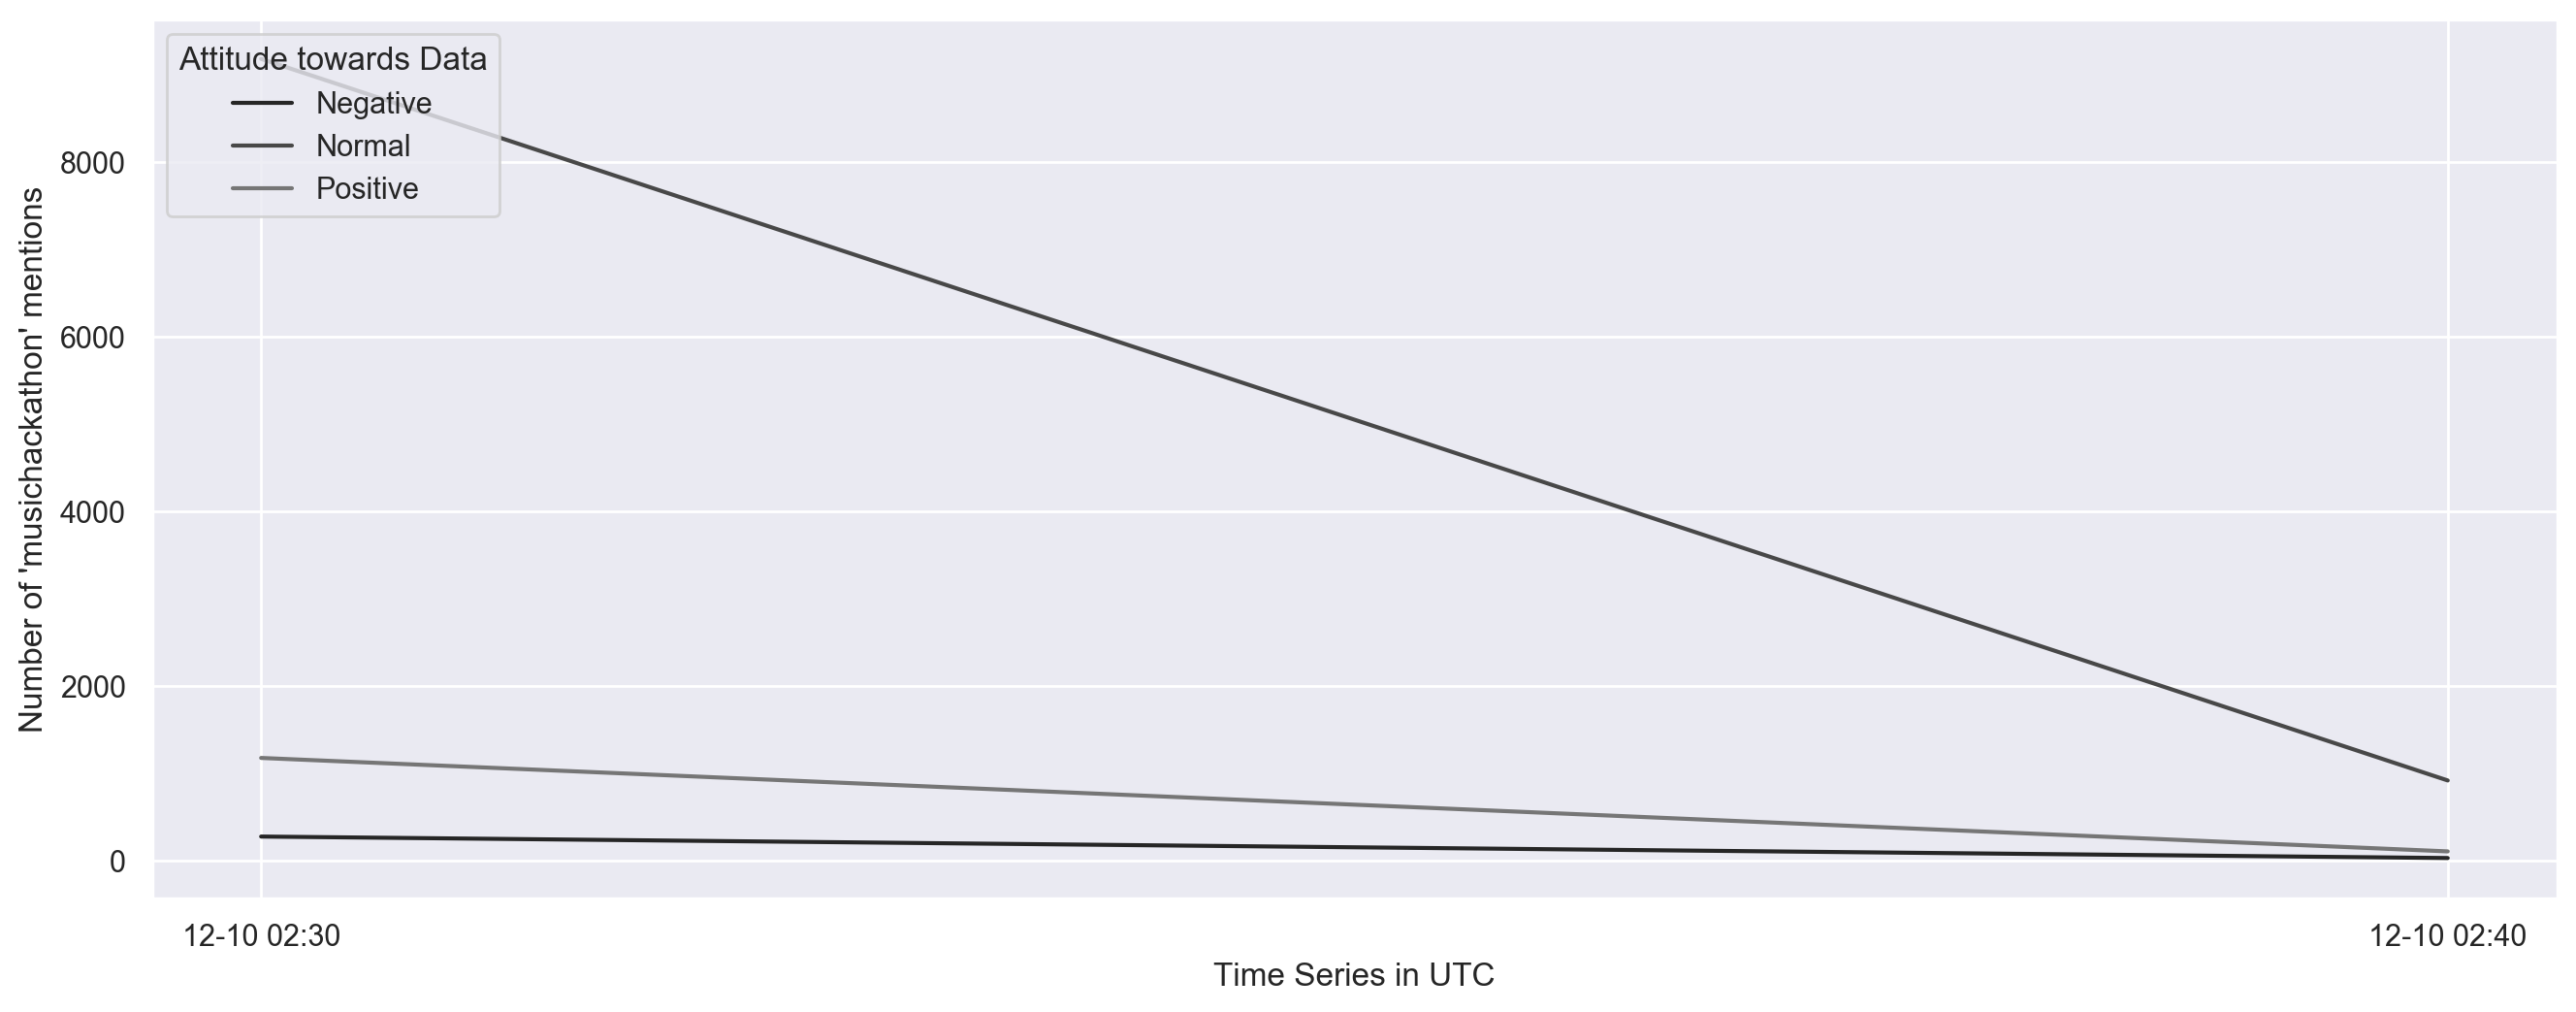

In [2]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Negative Tweets Monitor: Brand")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#262626","#484848", "#767676",]))#FF5A5F 
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Data', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [3]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MCL/MH Brand Sentiment Analysis")
location = geolocator.geocode("New York, NY")
print((location.latitude, location.longitude))
location.address

(40.7127281, -74.0060152)


'New York, United States of America'